In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [126]:
df = pd.read_csv("D:/4th year/Machine Learning/Practice/canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [127]:
df.isnull().sum()
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [128]:
x = df.iloc[:,:-1] # 1) x = df.iloc[:,1:2] 2) x = df["year"]
y = df.iloc[:,-1]
df.rename(columns={"per capita income (US$)": "capita"}, inplace=True)
#print(y)
df.head(10)

,year,capita
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


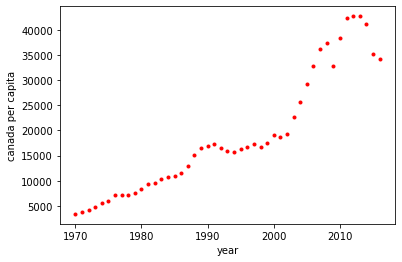

In [129]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('canada per capita')
plt.scatter(df.year,df.capita, color='red',marker='.')
#plt.legend()
#plt.show()

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state =0)
print('Shape of X_train',X_train.shape)
print('Shape of Y_train',Y_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of Y_test',Y_test.shape)

Shape of X_train (37, 1)
Shape of Y_train (37,)
Shape of X_test (10, 1)
Shape of Y_test (10,)


In [131]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

Predictions

In [132]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
#print("Predicted value:", y_pred)

In [133]:
print(reg.coef_)
print(reg.intercept_)

[838.48247458]
-1651800.0965383372


Training plot

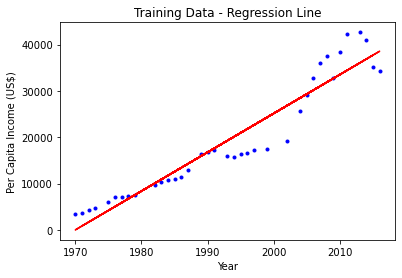

In [134]:
# Plotting regression line for training data
plt.scatter(X_train, Y_train, color='blue', marker='.')
plt.plot(X_train, reg.predict(X_train), color='red')
plt.title('Training Data - Regression Line')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.show()

Testing plot

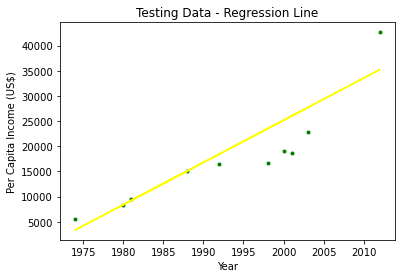

In [135]:
# Plotting regression line for testing data
plt.scatter(X_test, Y_test, color='green', marker='.')
plt.plot(X_test, reg.predict(X_test), color='yellow')
plt.title('Testing Data - Regression Line')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.show()

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# MSE and MAE for training data
train_mse = mean_squared_error(Y_train, y_train_pred)
train_mae = mean_absolute_error(Y_train, y_train_pred)

print("Mean Squared Error (MSE) on Training Data:", train_mse)
print("Mean Absolute Error (MAE) on Training Data:", train_mae)

Mean Squared Error (MSE) on Training Data: 13656588.671609873
Mean Absolute Error (MAE) on Training Data: 2926.632705393897


In [137]:
# MSE and MAE for testing data
test_mse = mean_squared_error(Y_test, y_test_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

print("Mean Squared Error (MSE) on Testing Data:", test_mse)
print("Mean Absolute Error (MAE) on Testing Data:", test_mae)

Mean Squared Error (MSE) on Testing Data: 22894407.002098337
Mean Absolute Error (MAE) on Testing Data: 3734.394683220244


No, it is not necessary to use StandardScaler on the target variable (y) in linear regression. Standardization is typically applied to the input features, not the target variable. The reason is that linear regression coefficients (weights) adjust themselves based on the scale of the input features. However, the target variable's scale does not affect the model in the same way.
In linear regression, the model aims to find the weights for each feature that minimize the sum of squared differences between the predicted and actual target values. Therefore, changing the scale of the target variable won't impact the model's ability to find the optimal weights.